In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

#### Removing columns where all rows are NA

In [4]:
df = df.drop(axis=1, columns = df.columns[df.isna().all()].tolist())

In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Data Cleaning

#### Fixing columns where entry count is not 39717

In [7]:
df['emp_length'] = df['emp_length'].fillna(0)
df['emp_title'] = df['emp_title'].fillna('Unknown')


#### Dropping unnecessary columns

In [8]:
# dropping desc, tax_liens (all values are 0),id,
# next_pymnt_d - only 1140 values are present
# chargeoff_within_12_mths - all values are 0
# pymnt_plan - all values are n
# out_prncp - most values are 0
# out_prncp_inv - most values are 0
# pub_rec_bankruptcies - most values are 0
# acc_now_delinq - all values are 0
# delinq_amnt - all values are 0
# initial_list_status - all values are f
# policy_code - all values are 1
# collections_12_mths_ex_med - all values are 0
# emp_title - 2459 unique values
# application_type - all values are individual
# delinq_2yrs - 32000 values are 0
# pub_rec - 34000 values are 0
df = df.drop(labels=['desc', 'tax_liens', 'id', 'url', 'title', 'zip_code', 'mths_since_last_delinq',
                     'mths_since_last_record','next_pymnt_d', 'chargeoff_within_12_mths', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 
                     'pub_rec_bankruptcies', 'acc_now_delinq', 'delinq_amnt', 'initial_list_status', 
                     'policy_code', 'collections_12_mths_ex_med', 'emp_title', 'application_type', 'delinq_2yrs', 
                     'pub_rec'], axis=1)   


#### Dropping redundant rows

In [9]:
# last_credit_pull_d - has 2 missing values - so deleting the rows
# revol_util - has 50 missing values - so deleting the rows
df = df[df['last_credit_pull_d'].notna()]
df = df[df['revol_util'].notna()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39665 non-null  int64  
 1   loan_amnt                39665 non-null  int64  
 2   funded_amnt              39665 non-null  int64  
 3   funded_amnt_inv          39665 non-null  float64
 4   term                     39665 non-null  object 
 5   int_rate                 39665 non-null  object 
 6   installment              39665 non-null  float64
 7   grade                    39665 non-null  object 
 8   sub_grade                39665 non-null  object 
 9   emp_length               39665 non-null  object 
 10  home_ownership           39665 non-null  object 
 11  annual_inc               39665 non-null  float64
 12  verification_status      39665 non-null  object 
 13  issue_d                  39665 non-null  object 
 14  loan_status              39

#### Looking into object dtypes which should be numeric or float

In [11]:
# term can be converted to int
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [12]:
# int_rate can be converted to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split('%')[0]))

In [13]:
# revol_util can be converted to float
df['revol_util'] = df['revol_util'].apply(lambda x: float(x.split('%')[0]))


In [14]:
df.to_csv('cleaned_loan.csv', index=False)

#### Removing outliers (we came to this while doing univariate analysis)

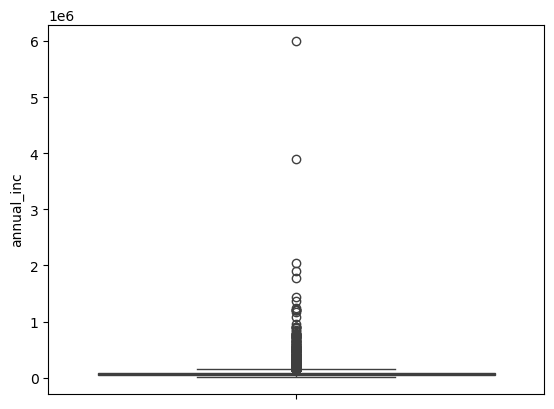

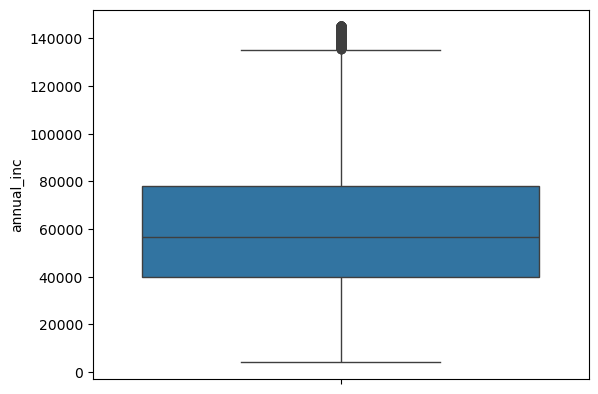

In [15]:
# There's a possibility of outliers in annual_inc, came to know while doing univariate analysis

sns.boxplot(df['annual_inc'])
plt.show()

# Let's remove the outliers

q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['annual_inc'] > lower_bound) & (df['annual_inc'] < upper_bound)]

sns.boxplot(df['annual_inc'])
plt.show()

#### Distribute based on defaulters, non-defaulters and current

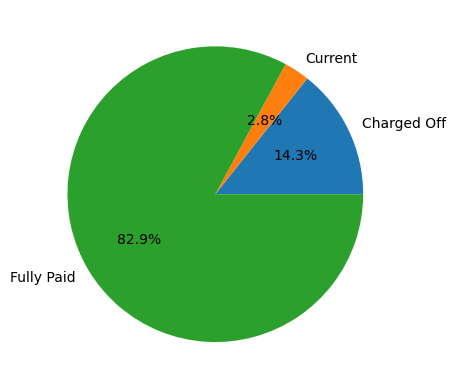

In [16]:
grouped_loadstatus = df.groupby('loan_status')['member_id'].count()
plt.pie(grouped_loadstatus, labels=grouped_loadstatus.index, autopct='%1.1f%%')
plt.show()

#### Getting rid of 2.9% of people who are currently paying off the loan

In [17]:
df = df[df['loan_status'] != 'Current']

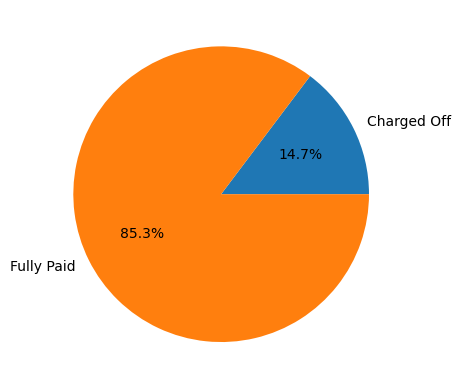

In [18]:
plt.pie(df.groupby('loan_status')['member_id'].count(), labels=df.groupby('loan_status')['member_id'].count().index, autopct='%1.1f%%')
plt.show()

14.6% of total people have defaulted,

we need to find out what defaulters have or do different than the people who fully pay their loan

In [19]:
defaulters = df[df['loan_status'] == 'Charged Off']
non_defaulters = df[df['loan_status'] == 'Fully Paid']

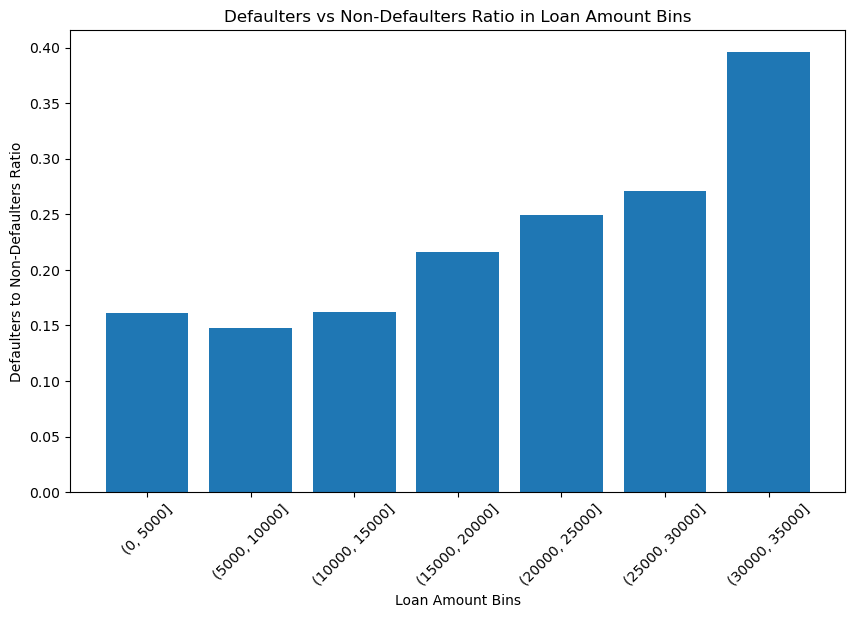

In [20]:
# Based on the loan amount

# Create bins for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# Group defaulters and non-defaulters by loan amount bins
defaulters_bins = defaulters.groupby(pd.cut(defaulters['loan_amnt'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['loan_amnt'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin
ratio = defaulters_bins / fullypaid_bins

# Plot the ratio
plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Loan Amount Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Loan Amount Bins')
plt.xticks(rotation=45)
plt.show()


##### We notice that ratio of defaulters increase as the loan amount increases

[0.1258305  0.34613077]
[36 60]


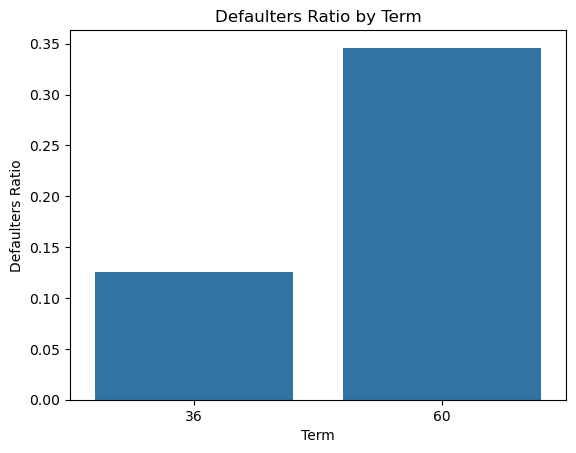

In [21]:

# Calculate defaulters/non_defaulters ratio for each term
defaulters_ratio = defaulters.groupby('term').size() / non_defaulters.groupby('term').size()
print(defaulters_ratio.values)
print(df['term'].unique())

# Plotting the bar plot
sns.barplot(x=defaulters_ratio.index, y=defaulters_ratio.values)
plt.xlabel('Term')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Term')
plt.show()

We notice that as term increases the number of defaulters to non-defaulters ratio also increases
This means that higher the term the higher the defaulters number

In [22]:
# based on interest rate
defaulters['int_rate'].value_counts().sort_index()

int_rate
5.42     20
5.79     16
5.99     19
6.03      5
6.17     10
         ..
23.52     4
23.59     1
23.91     1
24.11     1
24.40     1
Name: count, Length: 327, dtype: int64

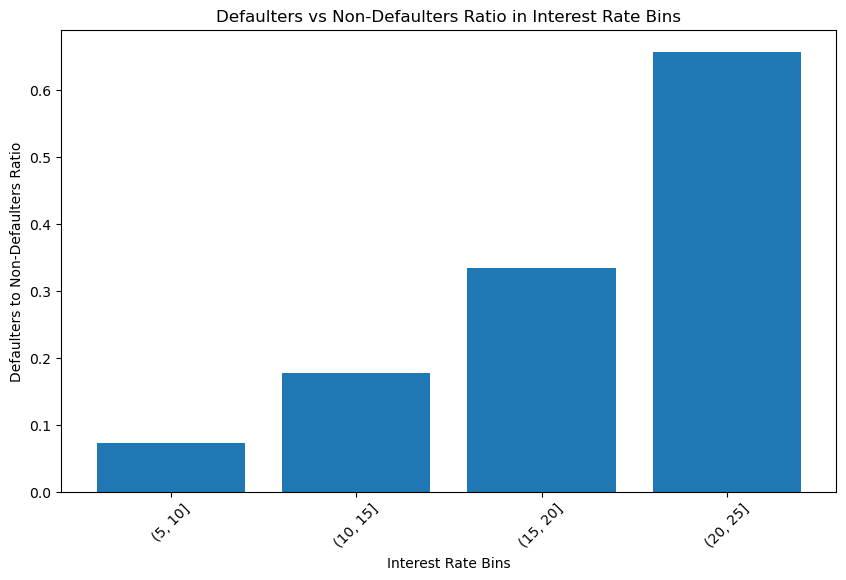

In [23]:
bins = [0, 5, 10, 15, 20, 25]
defaulters_bins = defaulters.groupby(pd.cut(defaulters['int_rate'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['int_rate'], bins)).size()

ratio = defaulters_bins / fullypaid_bins

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Interest Rate Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Interest Rate Bins')
plt.xticks(rotation=45)
plt.show()

We observe that ratio of defaulters also increases as interest rate increases.

Therefore we can say higher the interest rate higher the chances of defaulting

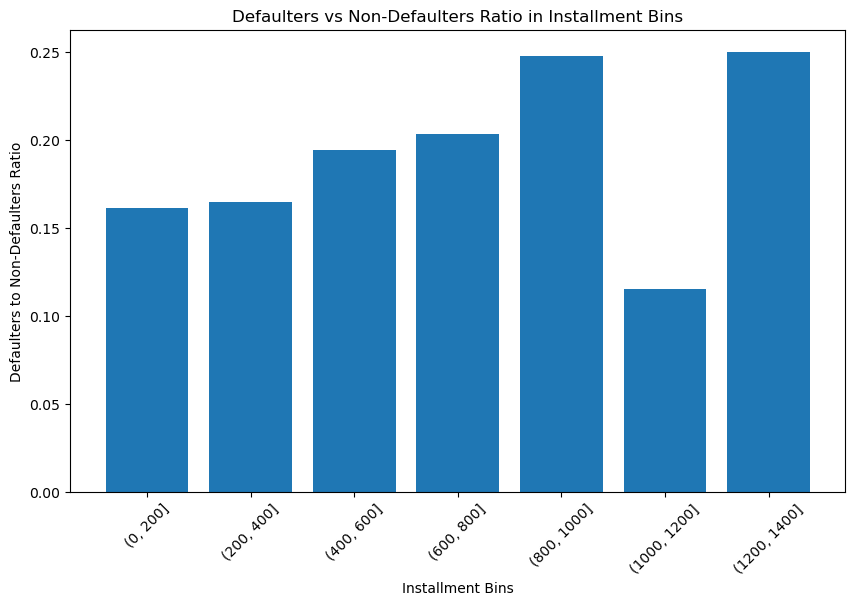

In [24]:
# based on installment
df['installment'].value_counts().sort_index()
# we see values from 15.69 to 1305.19
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
defaulters_bins = defaulters.groupby(pd.cut(defaulters['installment'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['installment'], bins)).size()

ratio = defaulters_bins / fullypaid_bins

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Installment Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Installment Bins')
plt.xticks(rotation=45)
plt.show()




We notice a trend for installment and defaulters ratio go hand in hand till 1000, but then there is a dip.
This might be due to outliers

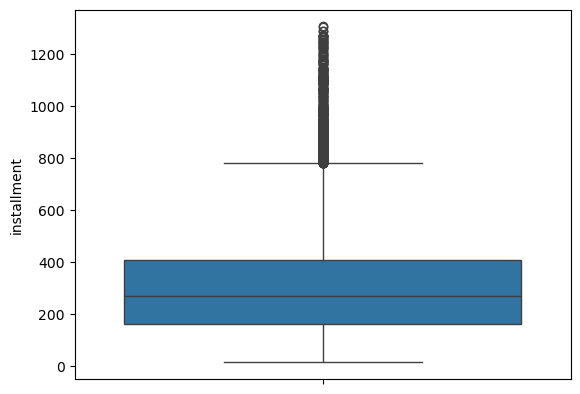

In [25]:
# Let's see if there are outliers in installment, we came to this conclusion while doing segmented univariate analysis on installment
sns.boxplot(df['installment'])
plt.show()

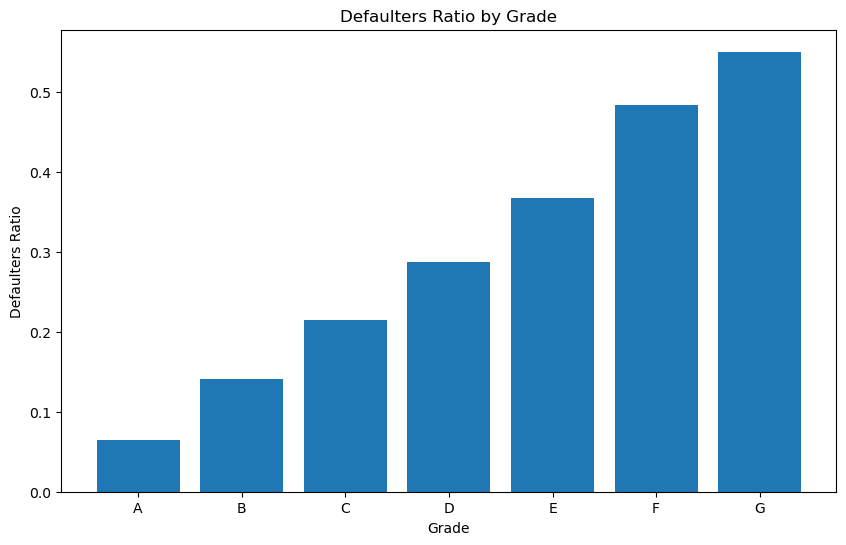

In [26]:
# Let's analyze for grade

# Create a pivot table
pivot = df.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters
pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Grade')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Grade')
plt.show()


We observe that the defaulters rate increases as the grade increases

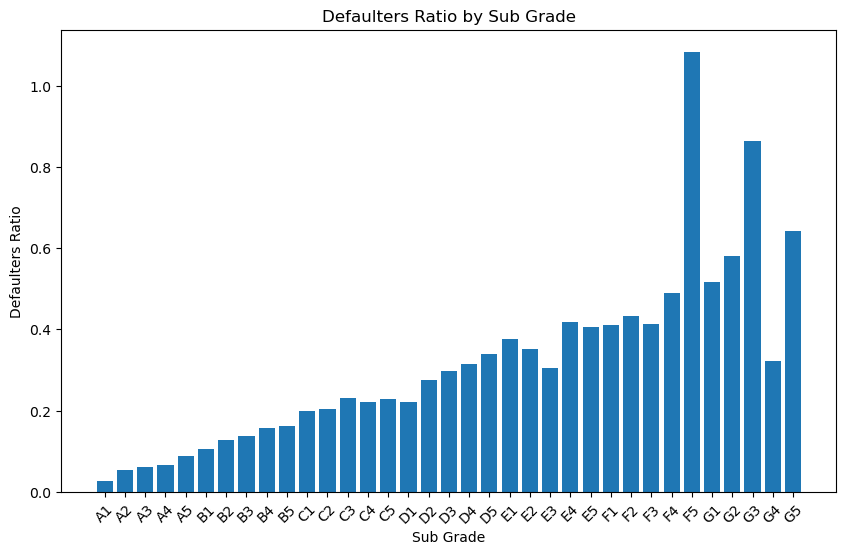

In [27]:
# Let's analyze for sub_grade

# Create a pivot table
pivot = df.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters
pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Sub Grade')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Sub Grade')
plt.xticks(rotation=45)
plt.show()

We observe the trend that defaulters increase as sub-grade moves from A1 to G5

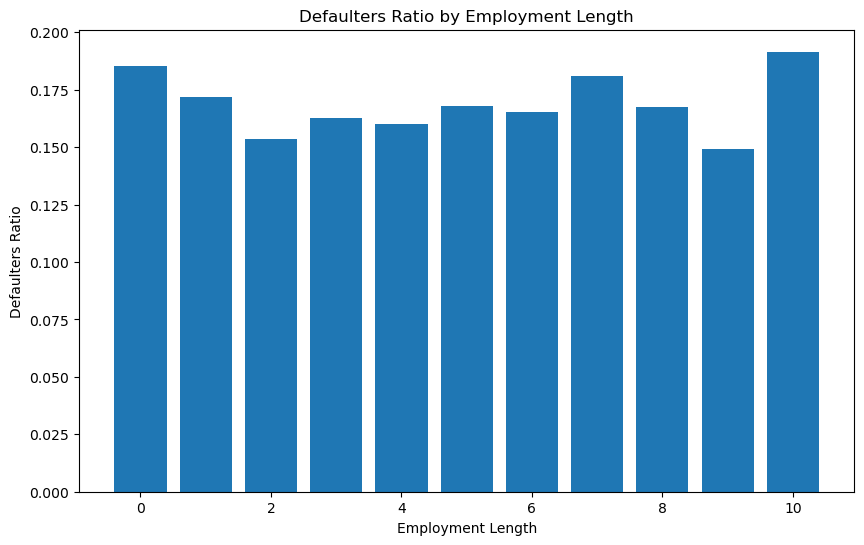

In [28]:
# Let's clean emp_length

df['emp_length'].value_counts()

# Replace < 1 year with 0
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if x == '< 1 year' else x)

# Replace 10+ years with 10
df['emp_length'] = df['emp_length'].apply(lambda x: 10 if x == '10+ years' else x)

df['emp_length'] = df['emp_length'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

df['emp_length'].value_counts()

# Let's analyze for emp_length

# Create a pivot table

pivot = df.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Employment Length')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Employment Length')
plt.show()


We observe no corellation between defaulters and the length of their employment

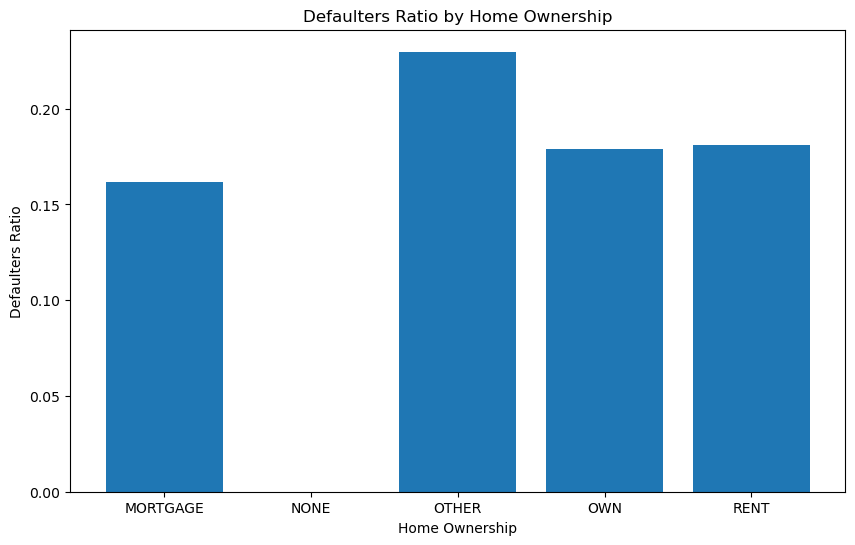

In [29]:
# Let's analyse for home_ownership

# Create a pivot table
pivot = df.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Home Ownership')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Home Ownership')
plt.show()


We notice no relation with home ownership and defaulters except that "Other" section has more of defaulters. But we don't know what values Others have in it

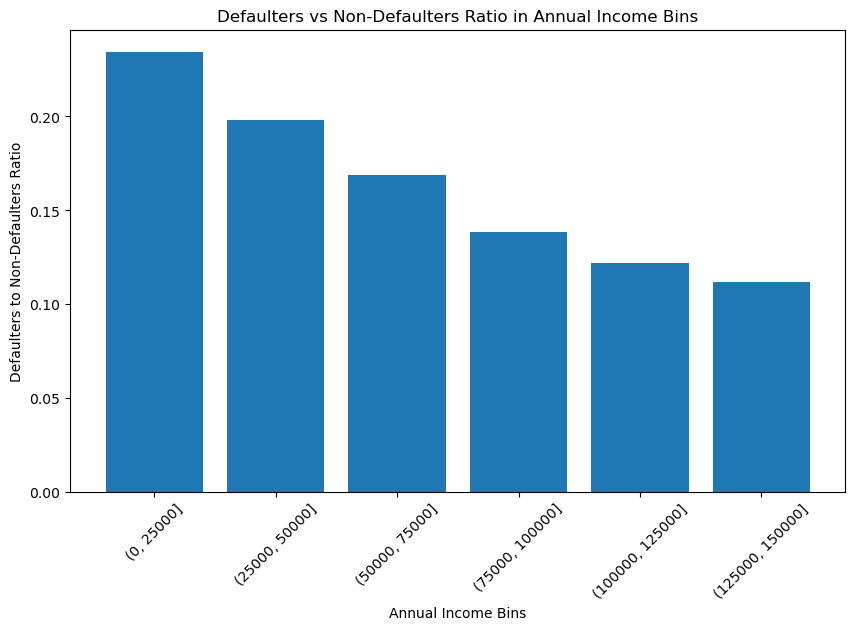

In [30]:
# Create bins for annual_inc

bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]

# Group defaulters and non-defaulters by annual_inc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['annual_inc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['annual_inc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Annual Income Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Annual Income Bins')
plt.xticks(rotation=45)
plt.show()

We observe as annual salary increases ratio of defaulters decreases. There is a co-relation between salary and defaulters

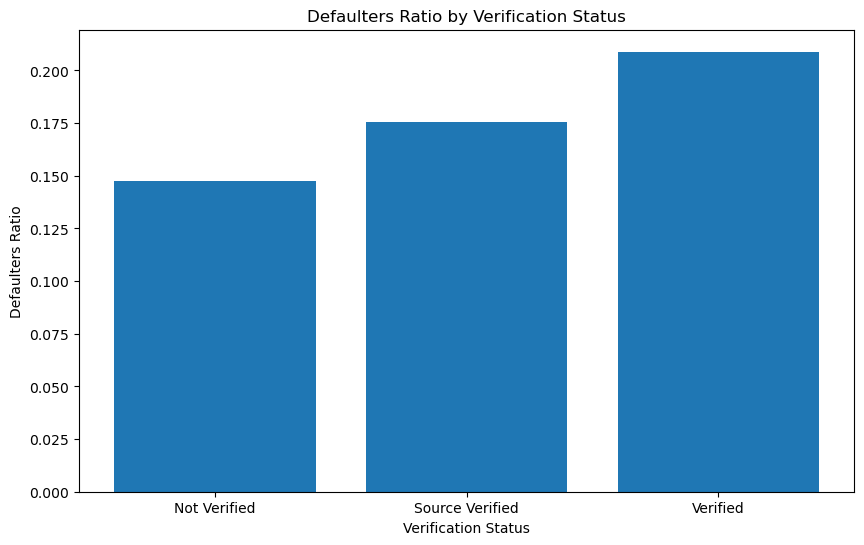

In [31]:
# Let's analyze for verification_status

# Create a pivot table

pivot = df.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Verification Status')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Verification Status')

plt.show()

We observe that defaulters rate increases for verified annual income. So there may be no relation between income verification and defaulters

In [32]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

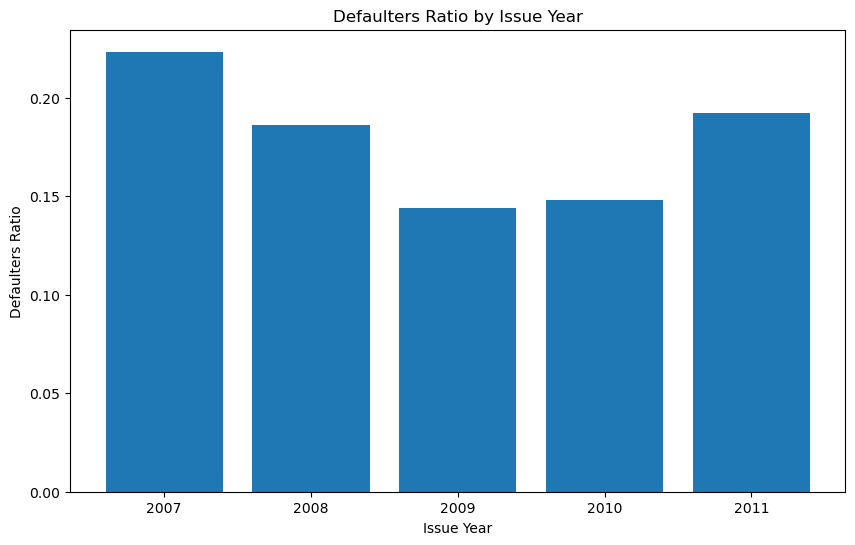

In [33]:
# Create a pivot table for issue year

pivot = df.pivot_table(index='issue_year', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Issue Year')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Issue Year')
plt.show()

No relation with issue year and defaulters

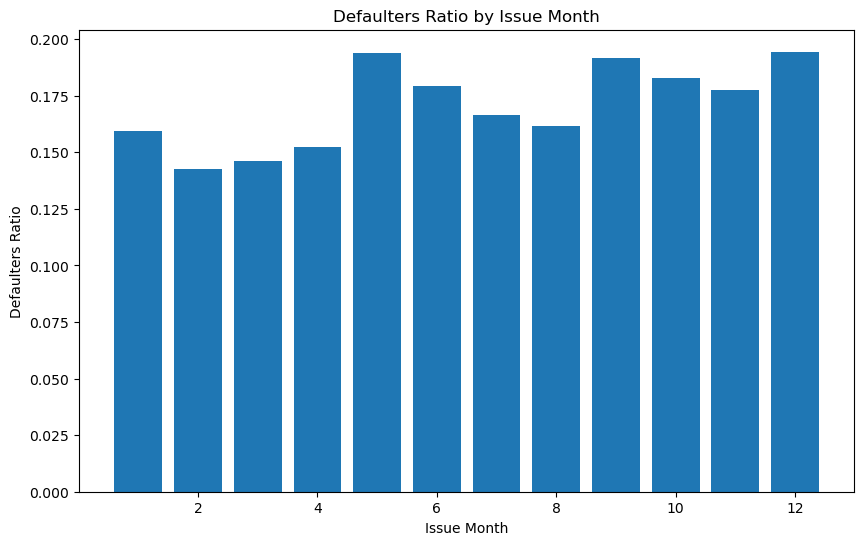

In [34]:
# Create a pivot table for issue month

pivot = df.pivot_table(index='issue_month', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Issue Month')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Issue Month')
plt.show()

No relation with issue month and defaulters

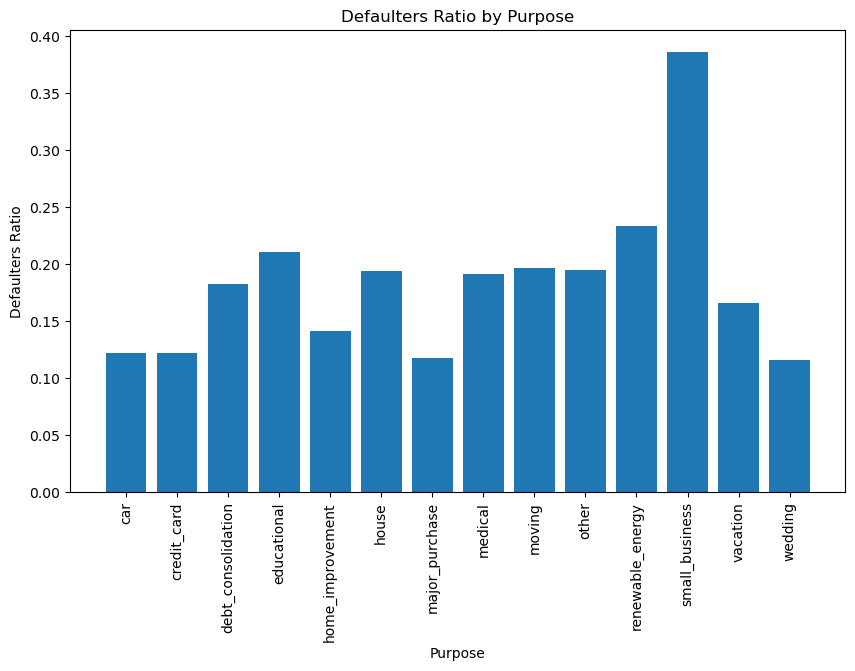

In [35]:
# Let's analyze for purpose

# Create a pivot table

pivot = df.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))

plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Purpose')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose')
plt.xticks(rotation=90)
plt.show()


We observe that members who have taken loan for small business tend to default more about 40%

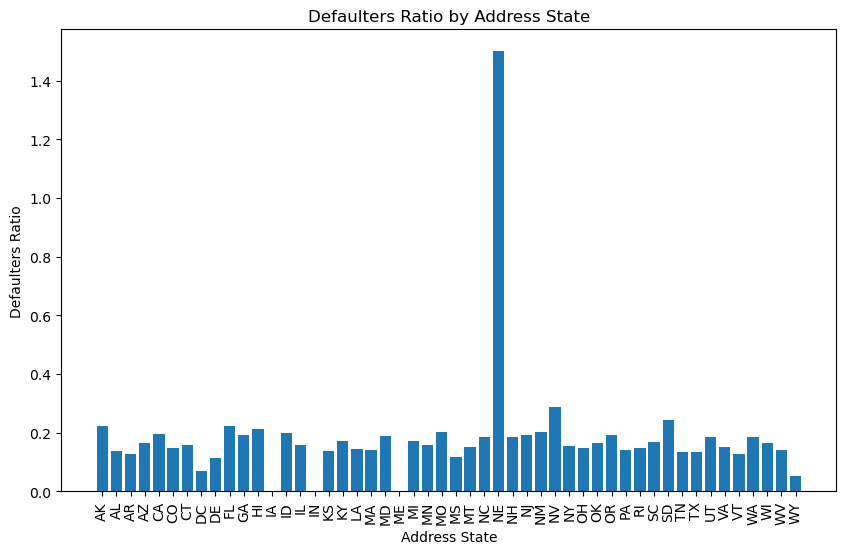

In [36]:
# Let's analyze for addr_state

# Create a pivot table

pivot = df.pivot_table(index='addr_state', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Address State')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Address State')
plt.xticks(rotation=90)
plt.show()

We observe that members from the state of NE have the highest defaulters ratio.

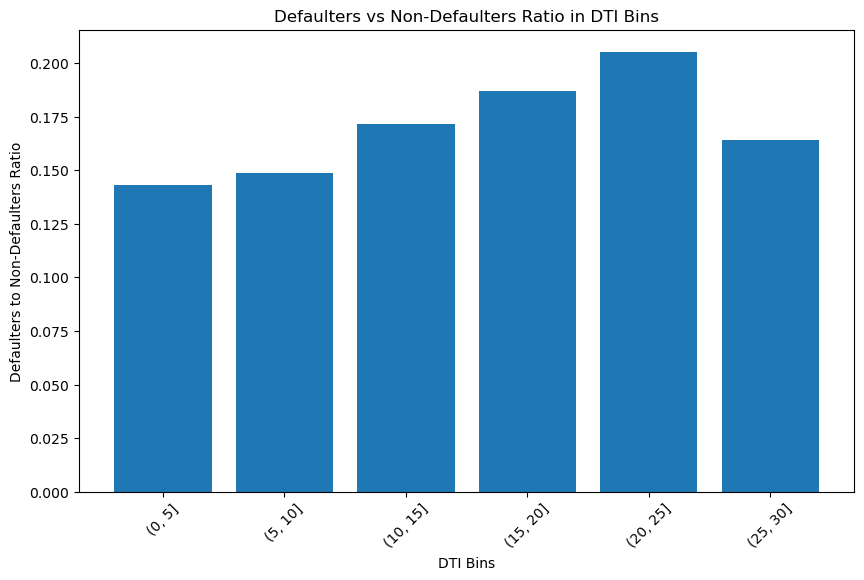

In [37]:
# Let's analyze for dti

df['dti'].value_counts().sort_index()   

# Create bins for dti

bins = [0, 5, 10, 15, 20, 25, 30]

# Group defaulters and non-defaulters by dti bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['dti'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['dti'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('DTI Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in DTI Bins')
plt.xticks(rotation=45)
plt.show()

we observe a trend that defaulters increase as dti increases

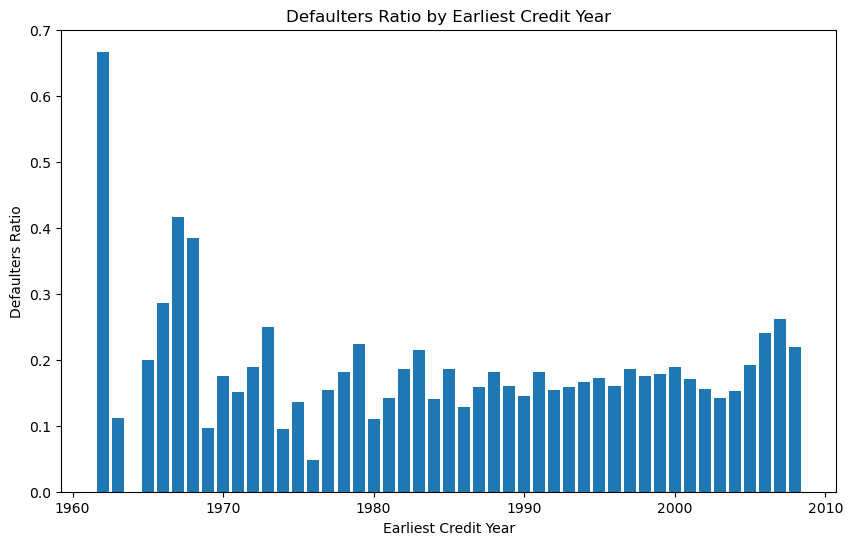

In [38]:
# Let's analyze for earliest_cr_line

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df.loc[df['earliest_cr_line'].dt.year >= 2020, 'earliest_cr_line'] -= pd.DateOffset(years=100)

df['earliest_cr_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

# Create a pivot table for earliest_cr_year

pivot = df.pivot_table(index='earliest_cr_year', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Earliest Credit Year')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Earliest Credit Year')
plt.show()


We don't see any relation between year and earliest_cr_line. Only that in 196x we see high defaulters once

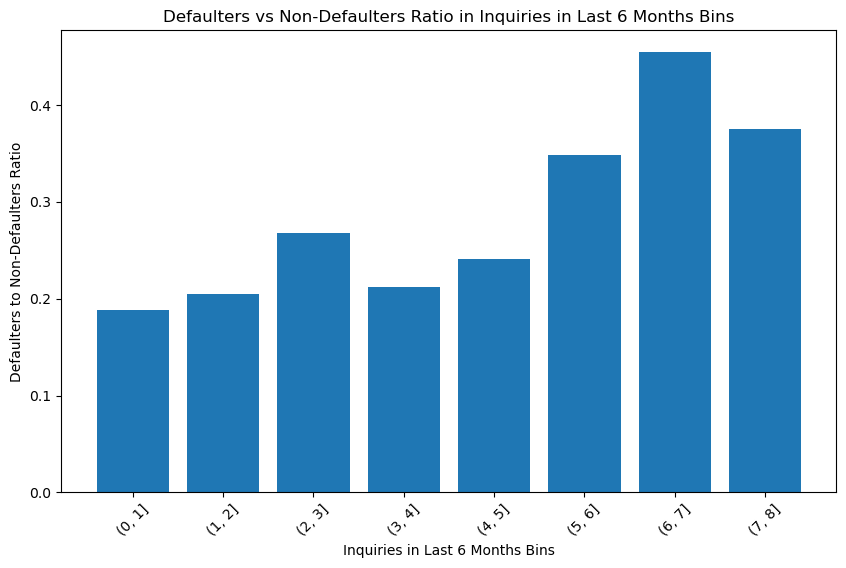

In [39]:
# Let's analyze for inq_last_6mths

df['inq_last_6mths'].value_counts().sort_index()

# Create bins for inq_last_6mths

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Group defaulters and non-defaulters by inq_last_6mths bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['inq_last_6mths'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['inq_last_6mths'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Inquiries in Last 6 Months Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Inquiries in Last 6 Months Bins')
plt.xticks(rotation=45)
plt.show()



No relation between inq_last_6mths and defaulters

<Axes: ylabel='open_acc'>

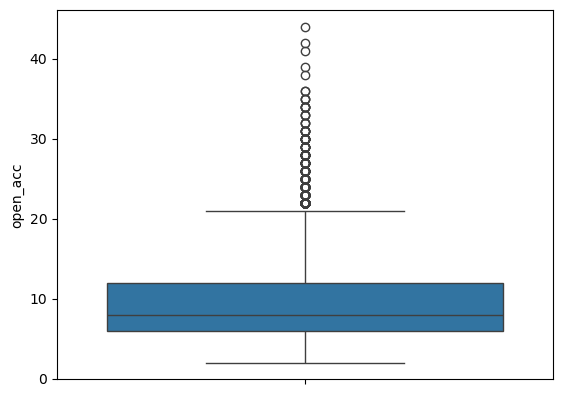

In [40]:
# Let's analyze for open_acc

df['open_acc'].value_counts().sort_index()

# Look for outliers in open_acc

sns.boxplot(df['open_acc'])

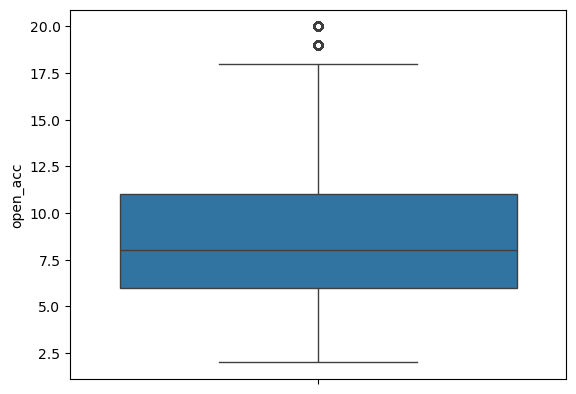

In [41]:
# Remove outliers in open_acc

q1 = df['open_acc'].quantile(0.25)
q3 = df['open_acc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['open_acc'] > lower_bound) & (df['open_acc'] < upper_bound)]

sns.boxplot(df['open_acc'])
plt.show()

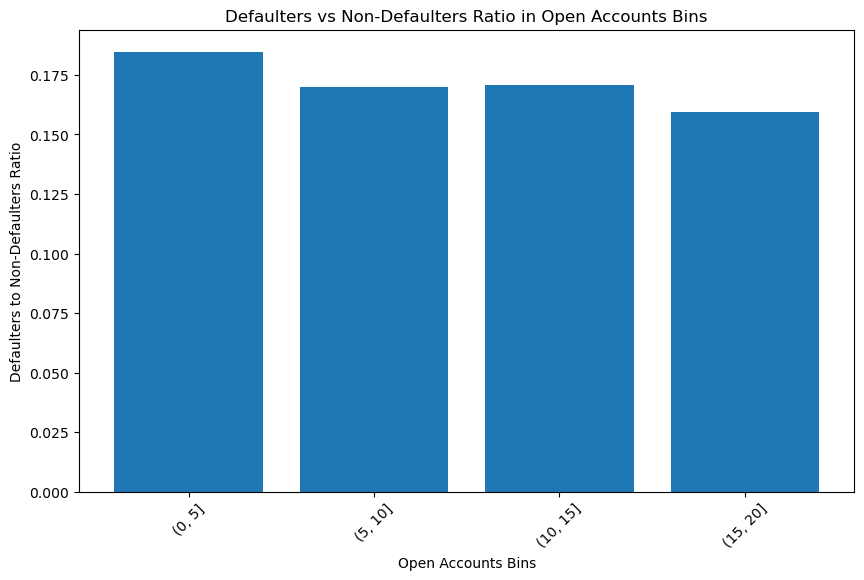

In [42]:

# Create bins for open_acc

bins = [0, 5, 10, 15, 20]

# Group defaulters and non-defaulters by open_acc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['open_acc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['open_acc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Open Accounts Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Open Accounts Bins')
plt.xticks(rotation=45)
plt.show()


No relation between open_acc and defaulter. It's almost constant

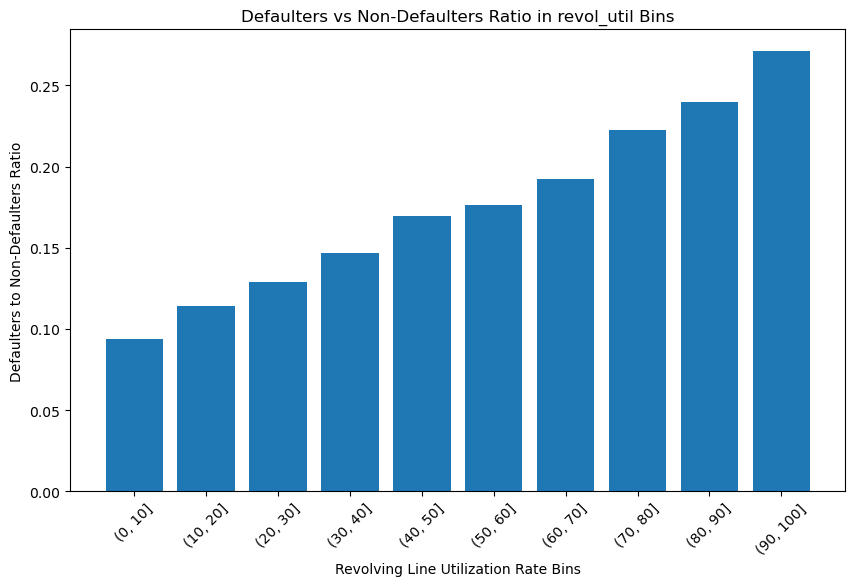

In [43]:
# Let's analyze for revol_util

df['revol_util'].value_counts().sort_index()

# Create bins for revol_util

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Group defaulters and non-defaulters by revol_util bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['revol_util'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['revol_util'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Revolving Line Utilization Rate Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in revol_util Bins')
plt.xticks(rotation=45)
plt.show()


We observe that the defaulters ratio increases as the revol_util increases

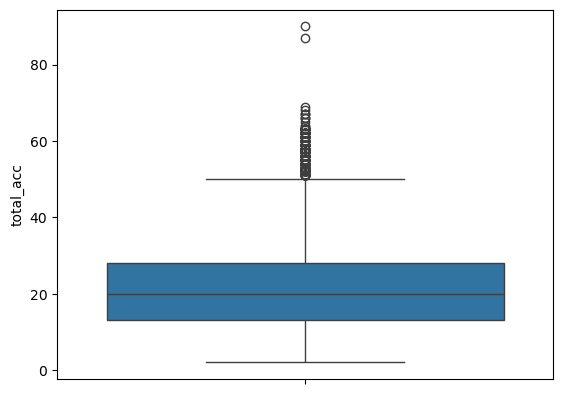

In [44]:
# Let's analyze for total_acc

df['total_acc'].value_counts().sort_index()

# Look for outliers in total_acc

sns.boxplot(df['total_acc'])
plt.show()

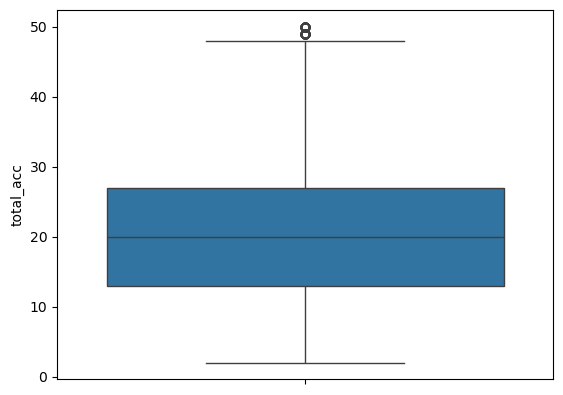

In [45]:
# Remove outliers in total_acc

q1 = df['total_acc'].quantile(0.25)
q3 = df['total_acc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['total_acc'] > lower_bound) & (df['total_acc'] < upper_bound)]

sns.boxplot(df['total_acc'])
plt.show()


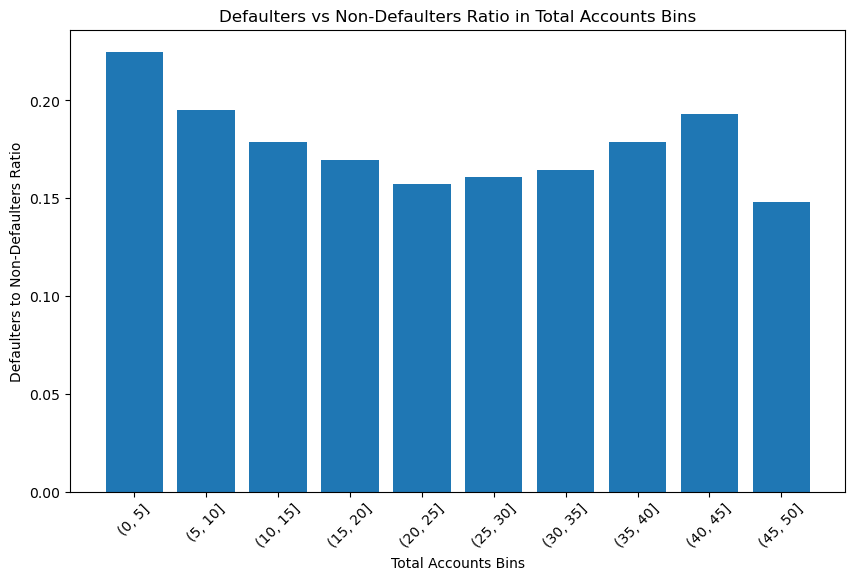

In [46]:

# Create bins for total_acc

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Group defaulters and non-defaulters by total_acc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['total_acc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['total_acc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins


# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Total Accounts Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Total Accounts Bins')
plt.xticks(rotation=45)
plt.show()


No relation between Total account bins and defaulters

Results of Segmented univariate analysis:

Following columns individually have impact on defaulters

loan_amnt, term, interest rate, installment, grade, sub-grade, annual salary, purpose= small business, state=Nebraska, dti, revol_util

### Bivariate Analysis

Possible options:

- Loan Amount, Term
- Loan Amount, Interest Rate
- Loan Amount, Annual Income
- Loan Amount, Employment Length
- Term, Purpose
- Term, Interest Rate
- Purpose, Annual Income
- Purpose, Installment
- Interest rate, Annual Income
- Loan Amount, dti
- Revol_util, purpose



loan_status          Charged Off  Fully Paid     ratio
loan_amnt_bins term                                   
0-5000         36           1013        7107  0.142536
               60            251         727  0.345254
5000-10000     36           1090        9089  0.119925
               60            480        1467  0.327198
10000-15000    36            490        4530  0.108168
               60            498        1576  0.315990
15000-20000    36            243        1946  0.124872
               60            454        1252  0.362620
20000-25000    36            151        1035  0.145894
               60            313         843  0.371293
25000-30000    36             17         142  0.119718
               60            103         298  0.345638
30000-36000    36             11         108  0.101852
               60            139         271  0.512915


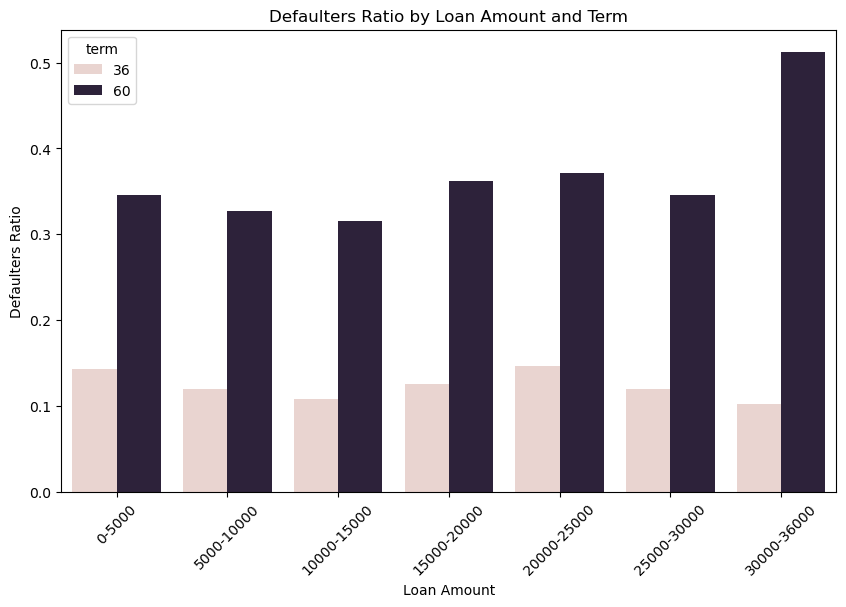

In [47]:
# Let's find correlation between Loan Amount and Term for loan status

# Let's bin the loan amount and create a pivot table

df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 36000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-36000'])

grouped = df.groupby(['loan_amnt_bins', 'term', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='term', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Term')
plt.xticks(rotation=45)
plt.show()


We observe that defaulters ratio increases for every term in each loan_amnt_bin and the trend is consistent. 

So we notice defaulters usually go for 60 month term period irrespective of the loan amount. That is something we can watch out for when giving out loans

loan_status                   Charged Off  Fully Paid     ratio
loan_amnt_bins int_rate_bins                                   
0-5000         5-10                   290        3239  0.089534
               10-15                  668        3713  0.179908
               15-20                  296         857  0.345391
               20-25                   10          25  0.400000
5000-10000     5-10                   308        4464  0.068996
               10-15                  832        4738  0.175602
               15-20                  407        1317  0.309036
               20-25                   23          37  0.621622
10000-15000    5-10                   136        2055  0.066180
               10-15                  479        2917  0.164210
               15-20                  328        1082  0.303142
               20-25                   45          52  0.865385
15000-20000    5-10                    38         676  0.056213
               10-15                  32

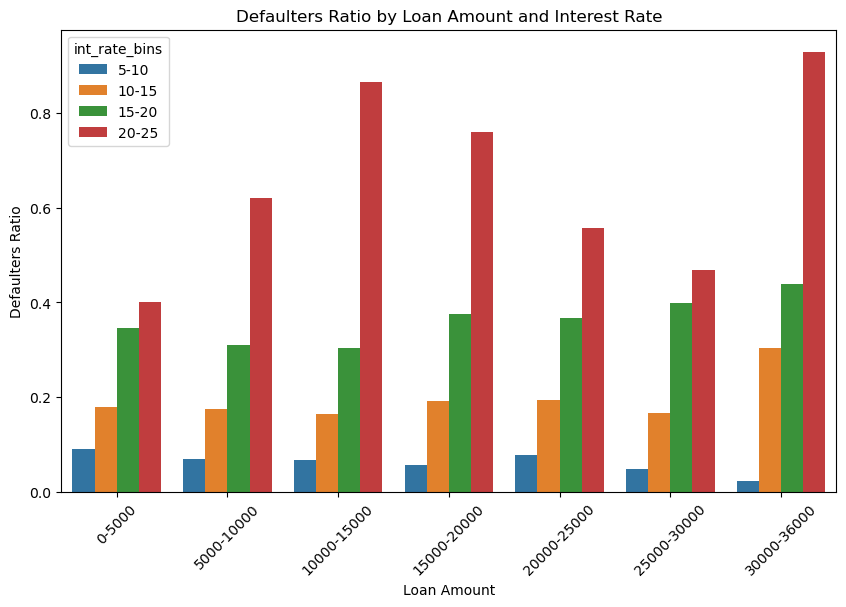

In [48]:
# Let's analyze for Interest Rate and Loan Amount for loan status

# Let's reuse the bins for loan amount and create a pivot table

# Let's create bins for interest rate

int_bins = [5, 10, 15, 20, 25]

df['int_rate_bins'] = pd.cut(df['int_rate'], bins=int_bins, labels=['5-10', '10-15', '15-20', '20-25'])

grouped = df.groupby(['loan_amnt_bins', 'int_rate_bins', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='int_rate_bins', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Interest Rate')
plt.xticks(rotation=45)
plt.show()



We observe the increase in defaulters ratio as the interest rate increases in each loan_amnt_bins. So we can conclude that higher interest rate may lead to higher number of defaulters regardless of the loan amount

loan_status                     Charged Off  Fully Paid     ratio
loan_amnt_bins annual_inc_bins                                   
0-5000         0-25000                  296        1302  0.227343
               25000-50000              602        3433  0.175357
               50000-75000              269        1982  0.135721
               75000-100000              67         747  0.089692
               100000-125000             21         283  0.074205
               125000-150000              9          87  0.103448
5000-10000     0-25000                  159         668  0.238024
               25000-50000              733        4211  0.174068
               50000-75000              449        3427  0.131018
               75000-100000             152        1484  0.102426
               100000-125000             49         572  0.085664
               125000-150000             28         194  0.144330
10000-15000    0-25000                   24          66  0.363636
          

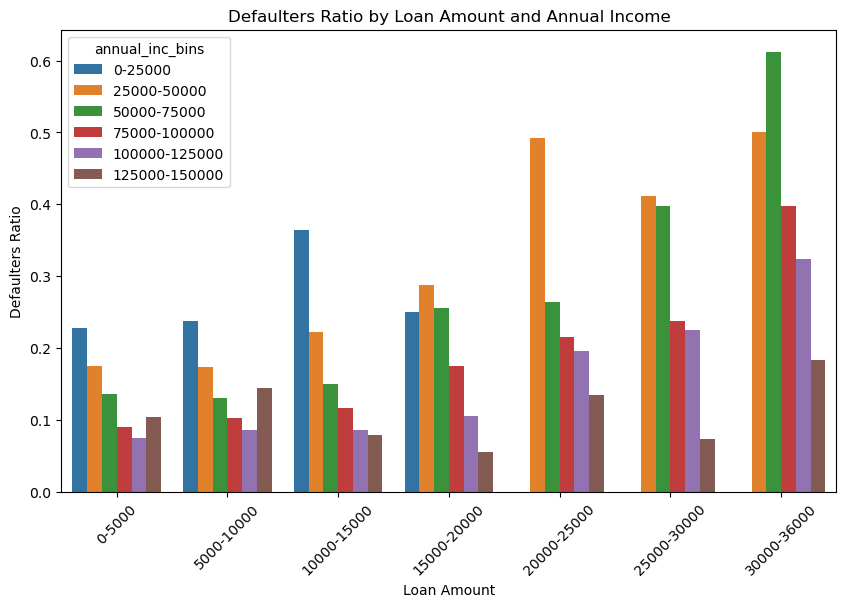

In [49]:
# Let's analyse for Loan Amount and Annual Income for loan status

# Let's reuse the bins for loan amount and create a pivot table

# Let's create bins for annual income

inc_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]

df['annual_inc_bins'] = pd.cut(df['annual_inc'], bins=inc_bins, labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000'])

grouped = df.groupby(['loan_amnt_bins', 'annual_inc_bins', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='annual_inc_bins', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Annual Income')
plt.xticks(rotation=45)
plt.show()


We can observe a trend that as annual income increases the defaulters ratio decreases regardless of the loan amount

loan_status                Charged Off  Fully Paid     ratio
loan_amnt_bins emp_length                                   
0-5000         0                   280        1498  0.186916
               1                   112         743  0.150740
               2                   159         986  0.161258
               3                   146         833  0.175270
               4                   114         665  0.171429
...                                ...         ...       ...
30000-36000    6                     6          17  0.352941
               7                     8          16  0.500000
               8                     7          20  0.350000
               9                     1          10  0.100000
               10                   62         156  0.397436

[77 rows x 3 columns]


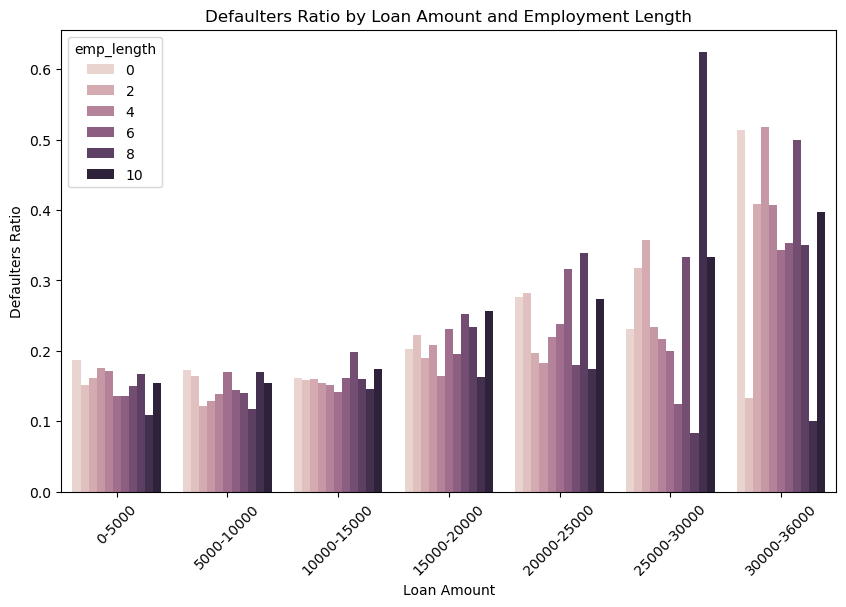

In [50]:
# Let's analyze for Loan Amount and Employment Length for loan status

# Let's reuse the bins for loan amount and create a pivot table

grouped = df.groupby(['loan_amnt_bins', 'emp_length', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='emp_length', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Employment Length')
plt.xticks(rotation=45)
plt.show()

We do not observe any relation between employment length and Loan Amount with respect to defaulters ratio

loan_status              Charged Off  Fully Paid     ratio
term purpose                                              
36   car                          80         847  0.094451
     credit_card                 295        3485  0.084648
     debt_consolidation         1373       10888  0.126102
     educational                  46         237  0.194093
     home_improvement            182        1614  0.112763
     house                        27         209  0.129187
     major_purchase              132        1488  0.088710
     medical                      67         416  0.161058
     moving                       70         381  0.183727
     other                       392        2558  0.153245
     renewable_energy             12          54  0.222222
     small_business              246         876  0.280822
     vacation                     36         267  0.134831
     wedding                      57         637  0.089482
60   car                          75         410  0.1829

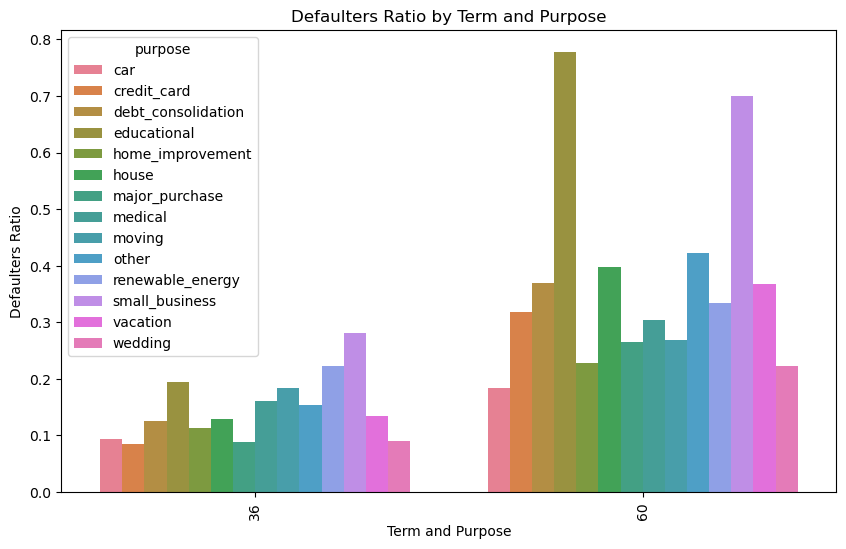

In [51]:
# Let's analyze for Term and Purpose for loan status

grouped = df.groupby(['term', 'purpose', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']
print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='ratio', hue='purpose', data=grouped.reset_index())
plt.xlabel('Term and Purpose')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Term and Purpose')
plt.xticks(rotation=90)
plt.show()


We observe high defaulters ratio for purposes like "small_business" regardless of term.



loan_status         Charged Off  Fully Paid     ratio
term int_rate_bins                                   
36   5-10                   704       10132  0.069483
     10-15                 1730       11450  0.151092
     15-20                  563        2350  0.239574
     20-25                   18          25  0.720000
60   5-10                    90         643  0.139969
     10-15                  843        2941  0.286637
     15-20                 1078        2507  0.429996
     20-25                  227         343  0.661808


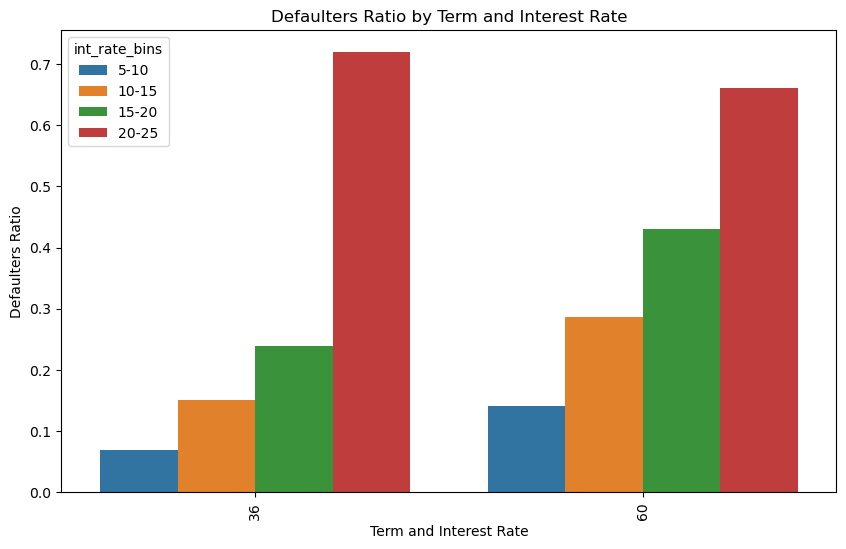

In [52]:
# Let's analyse for Term and Interest Rate for loan status

grouped = df.groupby(['term', 'int_rate_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='ratio', hue='int_rate_bins', data=grouped.reset_index())
plt.xlabel('Term and Interest Rate')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Term and Interest Rate')
plt.xticks(rotation=90)
plt.show()

We observe high defaulters ratio as the interest rate increases regardless of the term

loan_status              Charged Off  Fully Paid     ratio
purpose annual_inc_bins                                   
car     0-25000                   17         116  0.146552
        25000-50000               67         465  0.144086
        50000-75000               41         394  0.104061
        75000-100000              21         176  0.119318
        100000-125000              7          80  0.087500
...                              ...         ...       ...
wedding 25000-50000               36         267  0.134831
        50000-75000               29         298  0.097315
        75000-100000              12         110  0.109091
        100000-125000              6          57  0.105263
        125000-150000              3          25  0.120000

[84 rows x 3 columns]


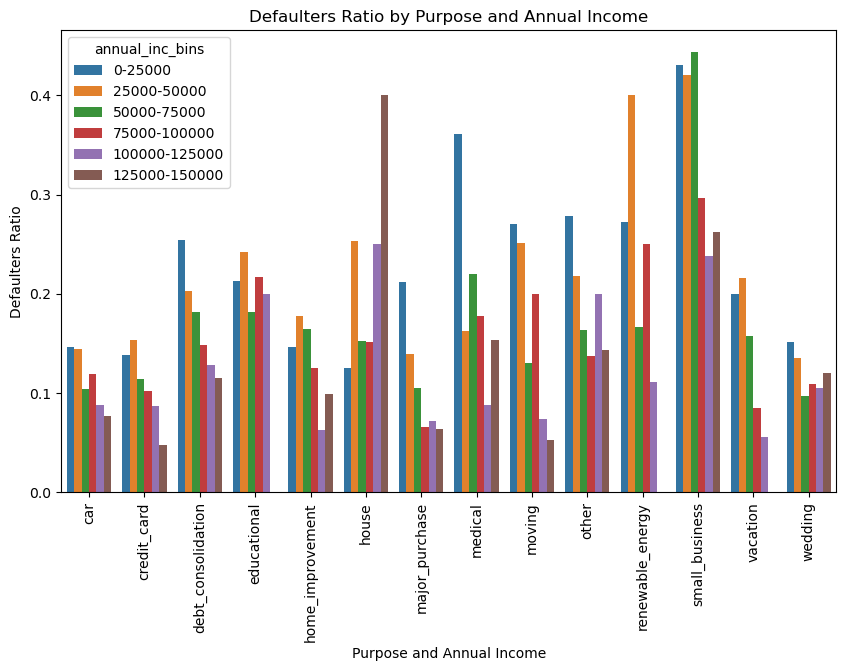

In [53]:
# Let's analyze for Purpose and Annual Income for loan status

grouped = df.groupby(['purpose', 'annual_inc_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='ratio', hue='annual_inc_bins', data=grouped.reset_index())
plt.xlabel('Purpose and Annual Income')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose and Annual Income')
plt.xticks(rotation=90)
plt.show()

We don't observe any corellation between purpose and annual income wrt defaulters. Each purpose has different defaulters of different annual income bins


loan_status                          Charged Off  Fully Paid     ratio
purpose            installment_bins                                   
car                0-200                     100         842  0.118765
                   200-500                    48         388  0.123711
                   500-800                     7          23  0.304348
                   800-1600                    0           4  0.000000
credit_card        0-200                     124        1152  0.107639
                   200-500                   286        2283  0.125274
                   500-800                    74         580  0.127586
                   800-1600                   21         130  0.161538
debt_consolidation 0-200                     620        3520  0.176136
                   200-500                  1400        7813  0.179189
                   500-800                   454        2311  0.196452
                   800-1600                  119         549  0.216758
educat

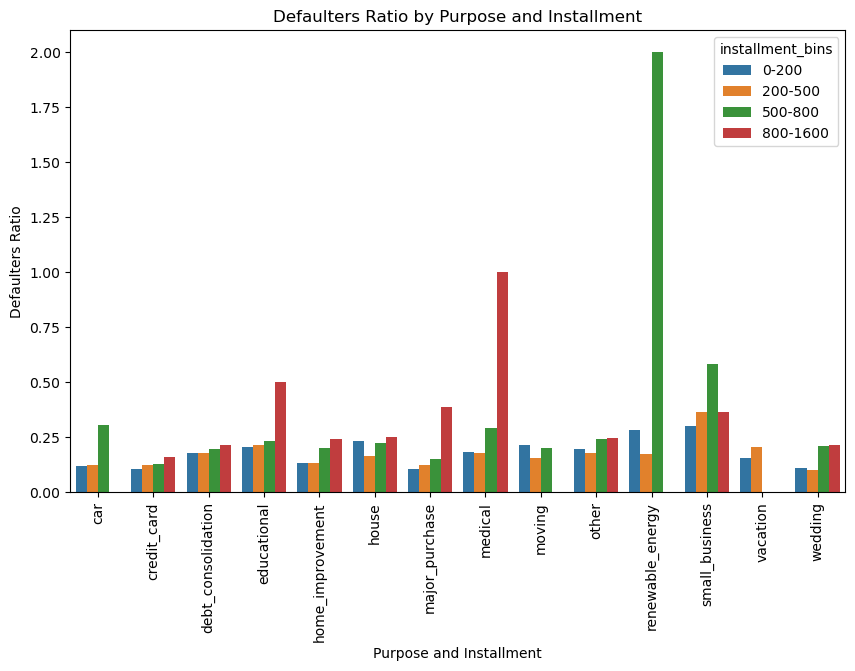

In [54]:
# Let's analyze for Purpose and Installment for loan status

# Let's create bins installment

bins = [0, 200, 500, 800, 1600]

df['installment_bins'] = pd.cut(df['installment'], bins=bins, labels=['0-200', '200-500', '500-800', '800-1600'])

grouped = df.groupby(['purpose', 'installment_bins','loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='ratio', hue='installment_bins', data=grouped.reset_index())
plt.xlabel('Purpose and Installment')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose and Installment')
plt.xticks(rotation=90)
plt.show()




Higher the installment -> higher the defaulters for most of the purpose except "small business"

loan_status                    Charged Off  Fully Paid     ratio
int_rate_bins annual_inc_bins                                   
5-10          0-25000                  100         748  0.133690
              25000-50000              358        3768  0.095011
              50000-75000              214        3490  0.061318
              75000-100000              81        1718  0.047148
              100000-125000             31         776  0.039948
              125000-150000             10         275  0.036364
10-15         0-25000                  255        1005  0.253731
              25000-50000             1087        5157  0.210781
              50000-75000              748        4511  0.165817
              75000-100000             323        2324  0.138985
              100000-125000            112        1006  0.111332
              125000-150000             48         388  0.123711
15-20         0-25000                  119         278  0.428058
              25000-50000

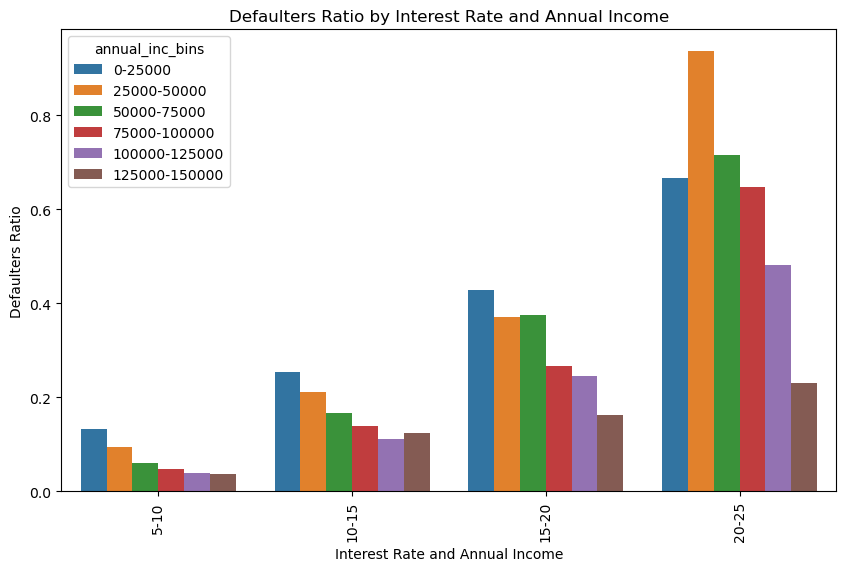

In [55]:
# Let's analyze for Interest Rate and Annual Income for loan status

grouped = df.groupby(['int_rate_bins', 'annual_inc_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's Plot a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate_bins', y='ratio', hue='annual_inc_bins', data=grouped.reset_index())
plt.xlabel('Interest Rate and Annual Income')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Interest Rate and Annual Income')
plt.xticks(rotation=90)
plt.show()

We observe as interest rate increases the defaulters increase and usually as annual income increases defaulters decrease and that is true for each interest rate bin

loan_status              Charged Off  Fully Paid     ratio
dti_bins loan_amnt_bins                                   
0-5      0-5000                  182        1388  0.131124
         5000-10000              187        1406  0.133001
         10000-15000              81         583  0.138937
         15000-20000              38         258  0.147287
         20000-25000              50         159  0.314465
         25000-30000               7          43  0.162791
         30000-36000               8          39  0.205128
5-10     0-5000                  240        1649  0.145543
         5000-10000              273        2309  0.118233
         10000-15000             188        1218  0.154351
         15000-20000              94         597  0.157454
         20000-25000              91         325  0.280000
         25000-30000              17          76  0.223684
         30000-36000              24          64  0.375000
10-15    0-5000                  289        1815  0.1592

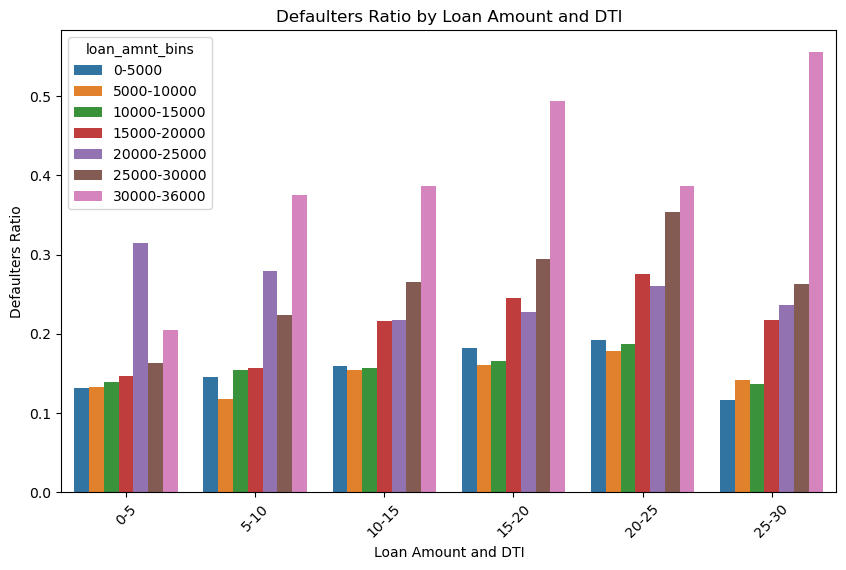

In [56]:
# Let's analyze for Loan Amount and dti for loan status

# Let's create bins for dti

bins = [0, 5, 10, 15, 20, 25, 30]

df['dti_bins'] = pd.cut(df['dti'], bins=bins, labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

grouped = df.groupby([ 'dti_bins', 'loan_amnt_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='dti_bins', y='ratio', hue='loan_amnt_bins', data=grouped.reset_index())
plt.xlabel('Loan Amount and DTI')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and DTI')
plt.xticks(rotation=45)
plt.show()


We don't observe increase in defaulters in each loan_amount_bins as dti increases

loan_status              Charged Off  Fully Paid     ratio
purpose revol_util_bins                                   
car     0-10                      12         238  0.050420
        10-20                     16         175  0.091429
        20-30                     21         169  0.124260
        30-40                     18         128  0.140625
        40-50                     14         113  0.123894
...                              ...         ...       ...
wedding 50-60                      8          65  0.123077
        60-70                     11          76  0.144737
        70-80                     11          56  0.196429
        80-90                     10          49  0.204082
        90-100                     6          42  0.142857

[140 rows x 3 columns]


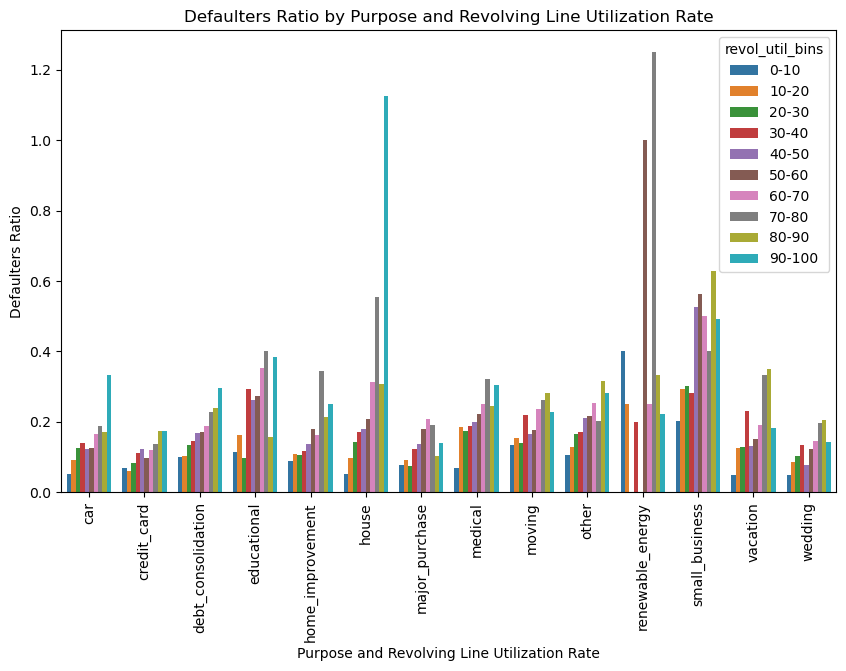

In [57]:
# Let's analyze for revol_util and purpose for loan status

# Let's bin revol_util

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df['revol_util_bins'] = pd.cut(df['revol_util'], bins, labels=['0-10', '10-20', '20-30','30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
                               

grouped = df.groupby(['purpose', 'revol_util_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='ratio', hue='revol_util_bins', data=grouped.reset_index())
plt.xlabel('Purpose and Revolving Line Utilization Rate')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose and Revolving Line Utilization Rate')
plt.xticks(rotation=90)
plt.show()

For each purpose, generally as revol_util increases the defaulters also increase

### Multi variate analysis

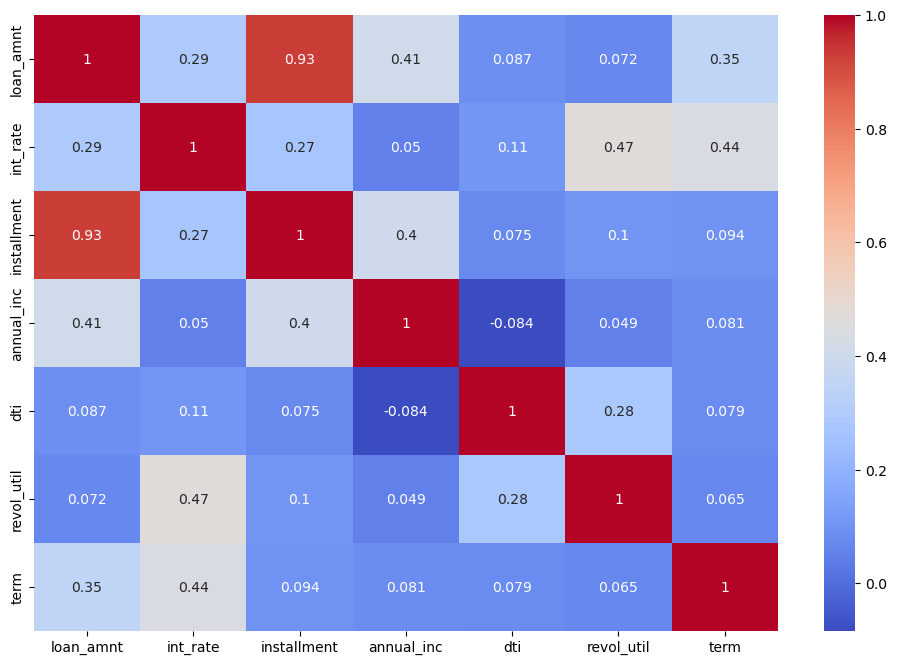

In [58]:
# Let's plot a heatmap for correlation between the numerical variables
continuous = ["loan_amnt", "int_rate", "installment", "annual_inc", "dti", "revol_util", "term"]

plt.figure(figsize=(12, 8))
sns.heatmap(df[continuous].corr(), annot=True, cmap='coolwarm')
plt.show()

We see high correlation between 

- loan amount and installment